
Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./model_MNIST\01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10198, saving model to ./model_MNIST\02-0.1020.hdf5

Epoch 00003: val_loss improved from 0.10198 to 0.08880, saving model to ./model_MNIST\03-0.0888.hdf5

Epoch 00004: val_loss improved from 0.08880 to 0.07830, saving model to ./model_MNIST\04-0.0783.hdf5

Epoch 00005: val_loss improved from 0.07830 to 0.07461, saving model to ./model_MNIST\05-0.0746.hdf5

Epoch 00006: val_loss improved from 0.07461 to 0.06749, saving model to ./model_MNIST\06-0.0675.hdf5

Epoch 00007: val_loss improved from 0.06749 to 0.06510, saving model to ./model_MNIST\07-0.0651.hdf5

Epoch 00008: val_loss improved from 0.06510 to 0.06258, saving model to ./model_MNIST\08-0.0626.hdf5

Epoch 00009: val_loss did not improve from 0.06258

Epoch 00010: val_loss improved from 0.06258 to 0.06238, saving model to ./model_MNIST\10-0.0624.hdf5

Epoch 00011: val_loss did not imp

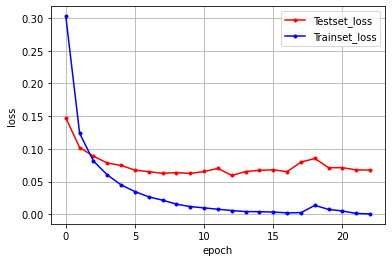

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

MODEL_DIR = './model_MNIST/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model_MNIST/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()